In [2]:
import quandl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import statsmodels

In [4]:
# Configure your API key 
quandl.ApiConfig.api_key = '2ZQYTVj4uuzeFaKyqiT-'

In [5]:
# Federal Reserve Economic Data-Natural Rate of Unemployement 
data = quandl.get('FRED/NROU')

In [6]:
data.head(6)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182
1950-04-01,5.287866


In [7]:
# Data Wragling 
data.shape

(332, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

In [32]:
# Descriptive Statistics 

In [9]:
data.describe()

,Value
count,332.000000
mean,5.316953
std,0.591270
min,4.272470
25%,4.817973
50%,5.377263
75%,5.805561
max,6.239927


In [33]:
# Downward trend representing non-stationary time-series 

<AxesSubplot:xlabel='Date'>

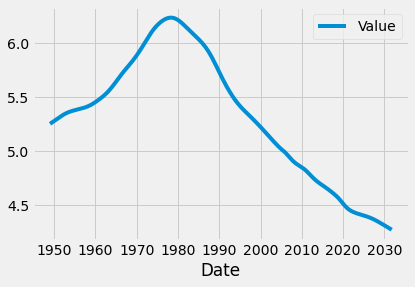

In [10]:
sns.lineplot(data=data)

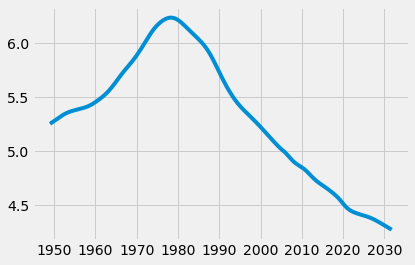

In [11]:
plt.plot(data)
plt.show()

In [12]:
data_2 = data.reset_index()

In [13]:
data_2.head()

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


In [14]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2022-09-01')]

In [15]:
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'],axis=1,inplace=True)
data_sub.head()

,Value
datetime,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


In [16]:
data_sub.isnull().sum()
data_sub.duplicated()
data_sub.drop_duplicates(inplace = True)

<AxesSubplot:xlabel='datetime'>

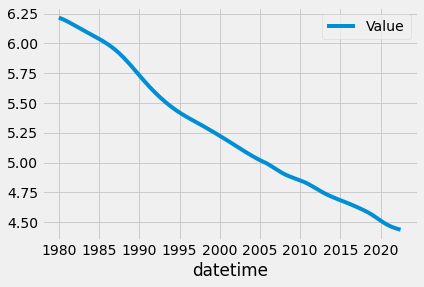

In [17]:
sns.lineplot(data=data_sub)

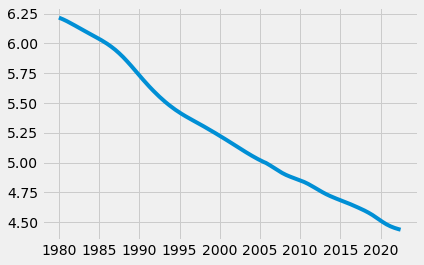

In [18]:
plt.plot(data_sub)
plt.show()

In [19]:
# statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

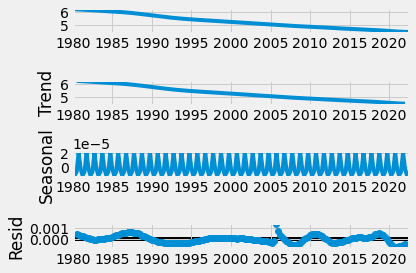

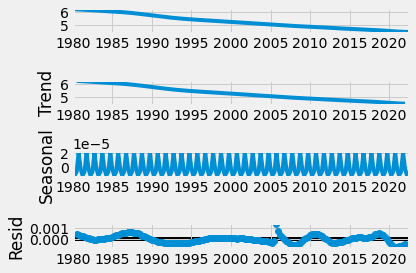

In [20]:
decomposition.plot()

In [21]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative')

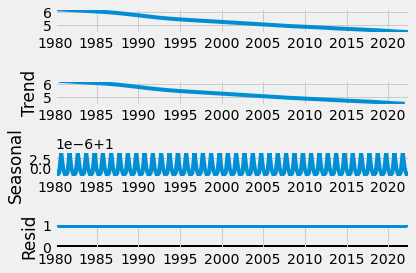

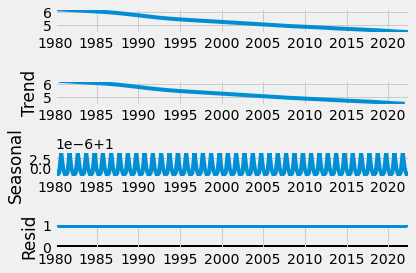

In [22]:
decomposition.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller # for adfuller reference to --> https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html?highlight=adfuller

def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')

    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

    
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.398514
p-value                          0.142156
Number of Lags Used              4.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


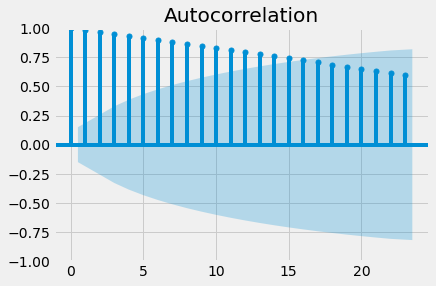

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [25]:
data_diff = data_sub - data.shift(1)

<AxesSubplot:>

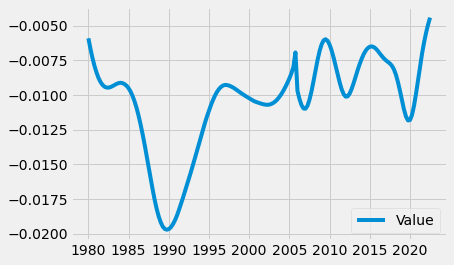

In [26]:
sns.lineplot(data=data_diff)

In [27]:
data_diff.isnull().sum()

data_diff.dropna(inplace = True)

In [28]:
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.416909
p-value                          0.137021
Number of Lags Used              2.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


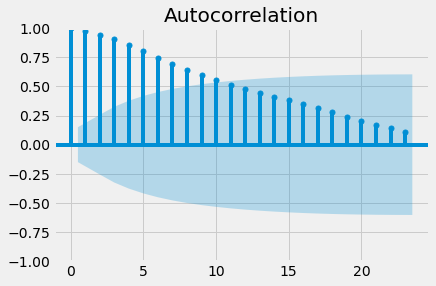

In [29]:
plot_acf(data_diff)
plt.show()